In [2]:
import re
import nltk

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
import nltk
nltk.download('punkt')

def format_sentence(sent):
    return({word: True for word in nltk.word_tokenize(sent)})

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
import io
pos = []
with io.open("C:/Users/Owner/Downloads/files/Masters/Courses/AIT 580/AIT580-master/data/pos_tweets.txt", 'rU', encoding='utf-8') as f:
    for i in f: 
        pos.append([format_sentence(i), 'pos'])

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
neg = []
with io.open("C:/Users/Owner/Downloads/files/Masters/Courses/AIT 580/AIT580-master/data/neg_tweets.txt", 'rU', encoding='utf-8') as f:
    for i in f: 
        neg.append([format_sentence(i), 'neg'])

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


In [9]:
training = pos[:int((.8)*len(pos))] + neg[:int((.8)*len(neg))]
test = pos[int((.8)*len(pos)):] + neg[int((.8)*len(neg)):]

In [10]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(training)

In [11]:
classifier.show_most_informative_features()

Most Informative Features
                      no = True              neg : pos    =     19.4 : 1.0
                    love = True              pos : neg    =     19.0 : 1.0
                 awesome = True              pos : neg    =     17.2 : 1.0
                headache = True              neg : pos    =     16.2 : 1.0
                      Hi = True              pos : neg    =     12.7 : 1.0
                     fan = True              pos : neg    =      9.7 : 1.0
               beautiful = True              pos : neg    =      9.7 : 1.0
                     New = True              pos : neg    =      9.7 : 1.0
                   Thank = True              pos : neg    =      9.7 : 1.0
                    haha = True              pos : neg    =      9.3 : 1.0


In [12]:
from nltk.classify.util import accuracy
print(accuracy(classifier, test))

0.8308457711442786


In [13]:
textfile = []
with open("C:/Users/Owner/Downloads/subreddit.txt",encoding='utf8') as f:
    for i in f:
        textfile.append(i) 

words = nltk.word_tokenize(str(textfile))

In [14]:
default_stopwords = stopwords.words('english')
default_stopwords.extend(['...','\'re','n\'t','\'the','\'this','\'it','n\'',
                         'it\\','\'1\\ti','\'0\\ti','\'0\\tda','.\\n','..\\n',
                         '1\\ti','\'1\\tthe'])

In [15]:
words = [word for word in words if len(word) > 2]
words = [word.lower() for word in words]
words = [word for word in words if word not in default_stopwords]

In [17]:
fdist = nltk.FreqDist(words)
for word, frequency in fdist.most_common(15):
    print(u'{};{}'.format(word, frequency))

washington;33
d.c.;31
metro;30
like;25
get;22
'what;22
dc\n;21
anyone;21
city;20
area;18
'dc;18
people;17
'is;17
one;16
need;15


In [18]:
import pip
pip.main(['install', '--user', 'wordcloud'])

You are using pip version 9.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


0

In [19]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequencies=fdist)

(-0.5, 799.5, 399.5, -0.5)

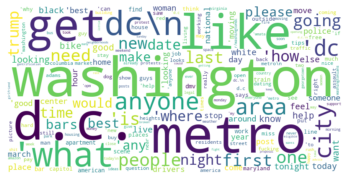

In [20]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [21]:
p=0
n=0
with io.open("C:/Users/Owner/Downloads/subreddit.txt", 'r+', encoding='utf-8') as f:
    for i in f: 
        classify=classifier.classify(format_sentence(i))
        if classify=='neg':
            n=n+1
        elif classify=='pos':
            p=p+1
if n>p:
    print('negative')
else:
    print('positive')

negative


In [29]:
output=open("text1_sentiment.txt","w+",encoding='utf-8')
with io.open("C:/Users/Owner/Downloads/subreddit_sentiment.txt", 'r+', encoding='utf-8') as f:
    for i in f: 
        x=classifier.classify(format_sentence(i))
        y=x+" "+i
        output.write(y)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Owner/Downloads/subreddit_sentiment.txt'